### Student Information
Name: 徐迺茜

Student ID: 109065504

GitHub ID: s105021127

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

## Part 1

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [5]:
import pandas as pd # 引用套件並縮寫為 pd

# my functions (這啥)
import helpers.data_mining_helpers as dmh

# construct dataframe from a list /用法:https://www.cjavapy.com/article/228/
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also (不懂為什麼不像上面那種方法寫)
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

###  >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [9]:
X.query('category == 1')[:10] #是不是只能用在int阿

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
39,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics


In [11]:
X.sort_index().loc[1:6]

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [12]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [13]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here

1. According to the above example, we can know that Pandas will treat '(STRING)' as strings instead of missing data. For example:'None','NaN' and ''. This causes isnull() to show False values.
2. If you want to show missing data, isnull() only detect values like None or numpy.NaN.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer here

1. add 3 columns ('text','category','category_name'), and corresponding datas.
2. add a missing data (called dummy_series), and use dropna(inplace=True) to delete it.
3. add duplicated dummy records (called dummy_duplicate_dict), and use drop_duplicates(keep=False, inplace=True) to delete them.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [18]:
X_sample = X.sample(n=1000) #random state

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

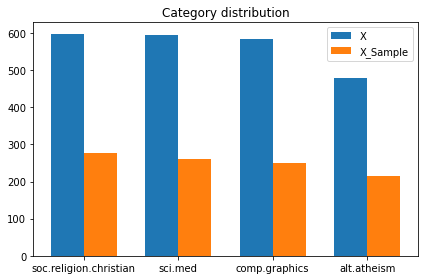

In [19]:
# Answer here

original = [X.category_name.value_counts()['soc.religion.christian'], 
            X.category_name.value_counts()['sci.med'],
            X.category_name.value_counts()['comp.graphics'],
            X.category_name.value_counts()['alt.atheism']]

sample = [X_sample.category_name.value_counts()['soc.religion.christian'], 
          X_sample.category_name.value_counts()['sci.med'],
          X_sample.category_name.value_counts()['comp.graphics'],
          X_sample.category_name.value_counts()['alt.atheism']]

group_labels = ['soc.religion.christian', 'sci.med','comp.graphics','alt.atheism']

xx = np.arange(len(group_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(xx - width/2, original, width, label='X')
rects2 = ax.bar(xx + width/2, sample, width, label='X_Sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Category distribution')
ax.set_xticks(xx)
ax.set_xticklabels(group_labels)
ax.legend()

fig.tight_layout()

plt.show()
 

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #可以知道一個 text有幾個string?

In [21]:
# Answer here
for t in range(100):
    if X_counts[4, t:t+1].toarray() == 1:
         print(count_vect.get_feature_names()[t:t+1])

['00']
['01']


### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

## Part 2